<a href="https://colab.research.google.com/github/BigguyPapsi/Colab/blob/main/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1.  Import


* import : ແມ່ນການນໍາເຂົ້າ

* imoprt : pandas ແລ້ວໃຫ້ເອີ່ນ pandas ວ່າ pd
* pandas ໃຊ້ໃນການຈັດການຂໍ້ມູນຂະໜາດນ້ອຍຈົນໄປຮອດຂໍ້ມູນຂະໜາດໃຫຍ່

* imoprt : numpy ແລ້ວໃຫ້ເອີ່ນ numpy ວ່າ np
* numpy ແມ່ນ Libary ທີ່ໃຊ້ໃນການຄຳນວນທາງຄະນິດສາດຂອງພາສາ Python ໂດຍ numpy ສາມາດຈັດການ ອາເຣ (array) ຫຼາຍມິຕິໄດ້

* imoprt : matplotlib.pyplot ແລ້ວໃຫ້ເອີ່ນ matplotlib.pyplot ວ່າ plt
* matplotlib ແມ່ນ Module ພື້ນຖາມໃນການສ້າງກຣາຟ ໃນພາສາ python

* imoprt : seaborn ແລ້ວໃຫ້ເອີ່ນ seaborn ວ່າ sns
* seaborn ເປັນ libary ຂອງ matplotlib ທີ່ໃຊ້ໄວ້ແຈກແຈງໃຫ້ເຮົາເຫັນພາບຂໍ້ມູນທີ່ເປັນແບບ ສຸ່ມ

* %matplotlib inline ແມ່ນຄຳສັ່ງອະນຸຍາດໃຫ້ເຮົາສະແດງກຣາຟ(graph) ໃນ Notebook ໄດ້
* %config InlineBackend.figure_format='retina' ແມ່ນການຕັ້ງຄ່າການສະແດງຜົນຂອງກຣາຟ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

#2 ກວດ Version

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.5
numpy   version = 1.21.6
seaborn version = 0.11.2


#3 ສະແດງ Timezone

In [3]:
pd.Timestamp.now()

Timestamp('2023-01-28 20:05:26.337287')

#4 ນຳ Dataset ເຂົ້າມາໃນ NoteBook ແລະ ສະແດງຕົວຢ່າງ 5 ອັນແບບສຸມ

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,versicolor
0,5.1,3.5,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
71,6.1,2.8,4.0,1.3,versicolor
2,4.7,3.2,1.3,0.2,setosa


#5 ນັບຂໍ້ມູນທີ່ຢູ່ໃນ Dataset ແລ້ວເອົາມາສະແດງສະແດງ

In [5]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#6 ສະແດງ ຫົວຖັນ (ColumnsHead)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#7 ສະແດງຂໍ້ມູນທີ່ໄດ້ມາຈາກ Dataset ອອກມາໃນຮູບແບບ Graph ເປັນຮູບແບບຕ່າງໆ ຕາມຂໍ້ມູນທີ່ເຮົາໄດ້ມາ.

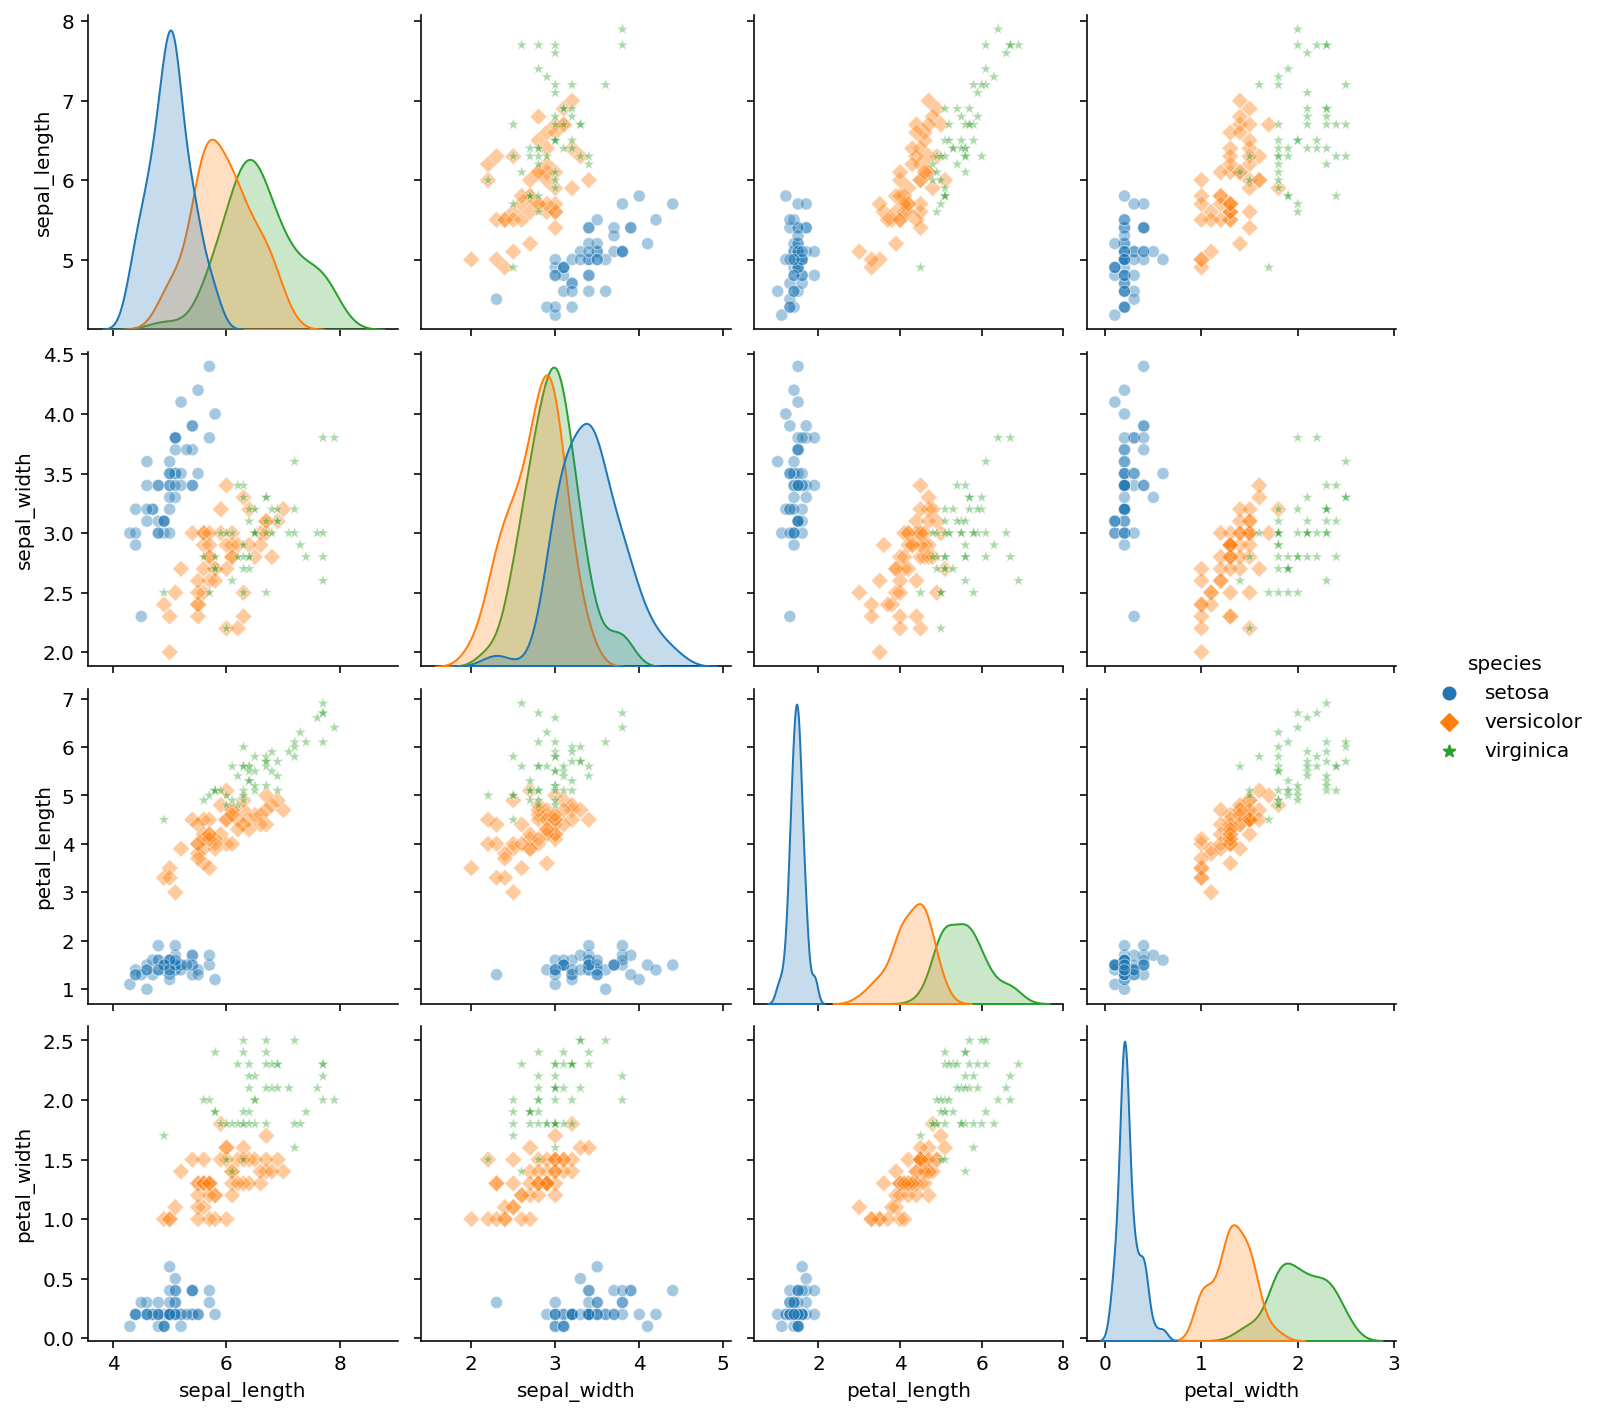

In [7]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
              hue='species', 
              markers=['o', 'D', '*'],
             plot_kws={'alpha': .4});

#8 sklearn ເປັນ Libary ຂອງ Machine learning


In [8]:
from sklearn.cluster import KMeans

#9 ສ້າງໂຕປ່ຽນ X ມາເກັບຂໍ້ມູນຂອງຖັນ

In [9]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# X = df[['petal_length', 'petal_width']]

#10 ເປັນຊຸດເຄື່ອງມືທີ່ໃຊ້ວິເຄາະຮູບກັບຂໍ້ມູນ ທີ່ອອກແບບມາເພື່ອອຳນວຍຄວາມສະດວກໃຫ້ແກ້ sklearn

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

In [11]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#12 Setup silhouette_plot


*   ການເຮັດຕົວຢ່າງຂໍ້ມູນ ແລະ visualizer
*   ການຕັ້ງຄ່າ ການ training data ໃຫ້ມັນພໍດີກັບການ visualizer




In [12]:
def silhouette_plot(X, from_k, to_k):
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X)
        visualizer.poof()

#13 ສະແດງ silhouette_plot




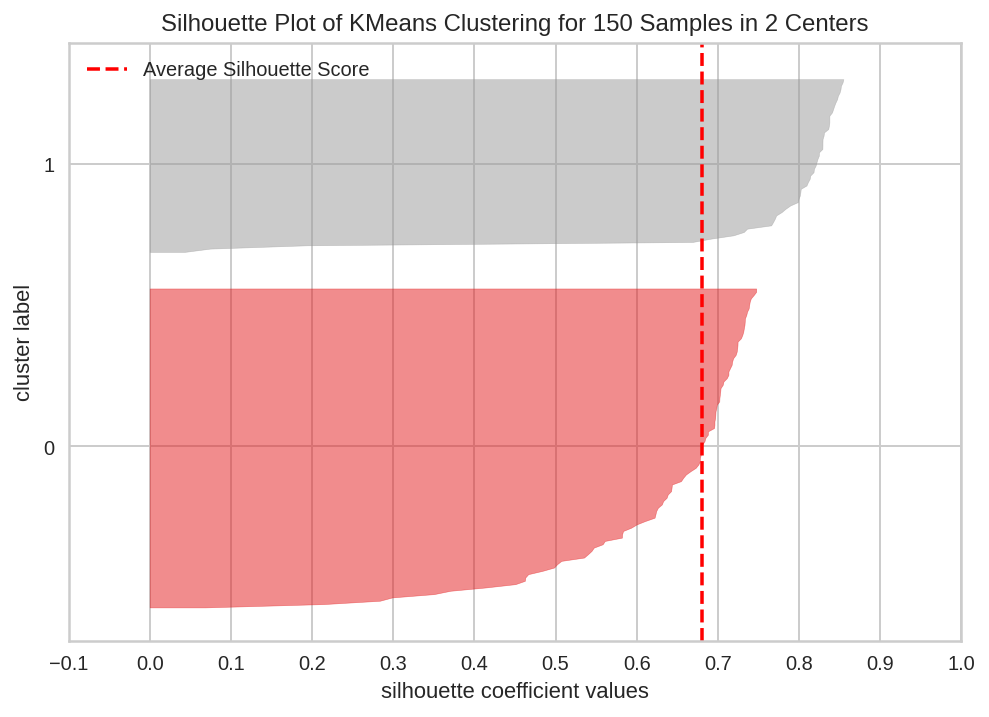

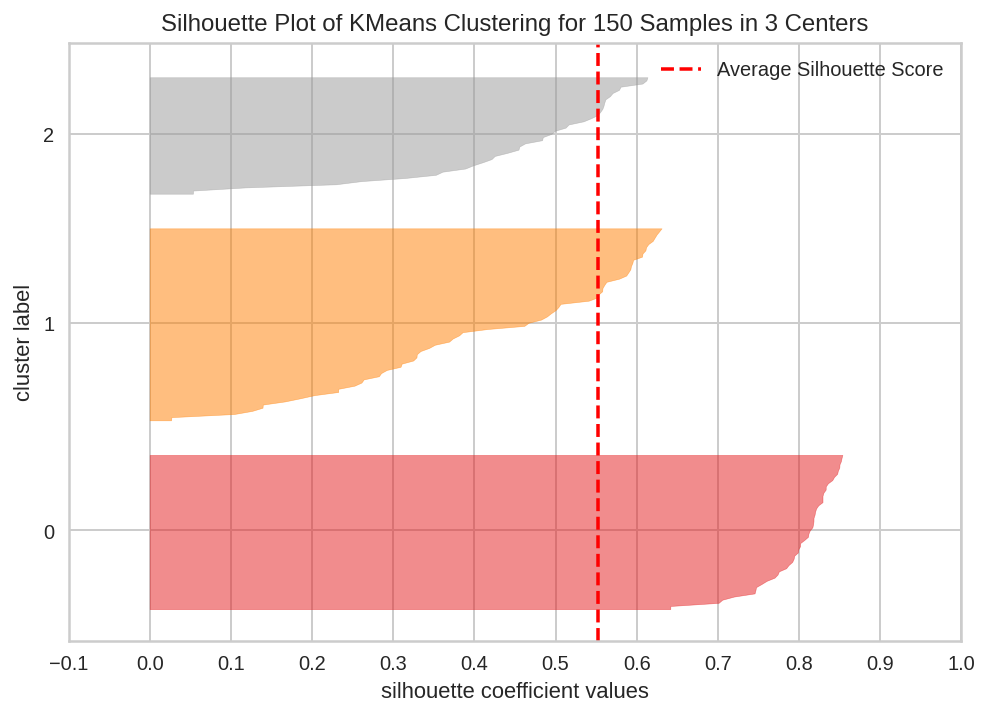

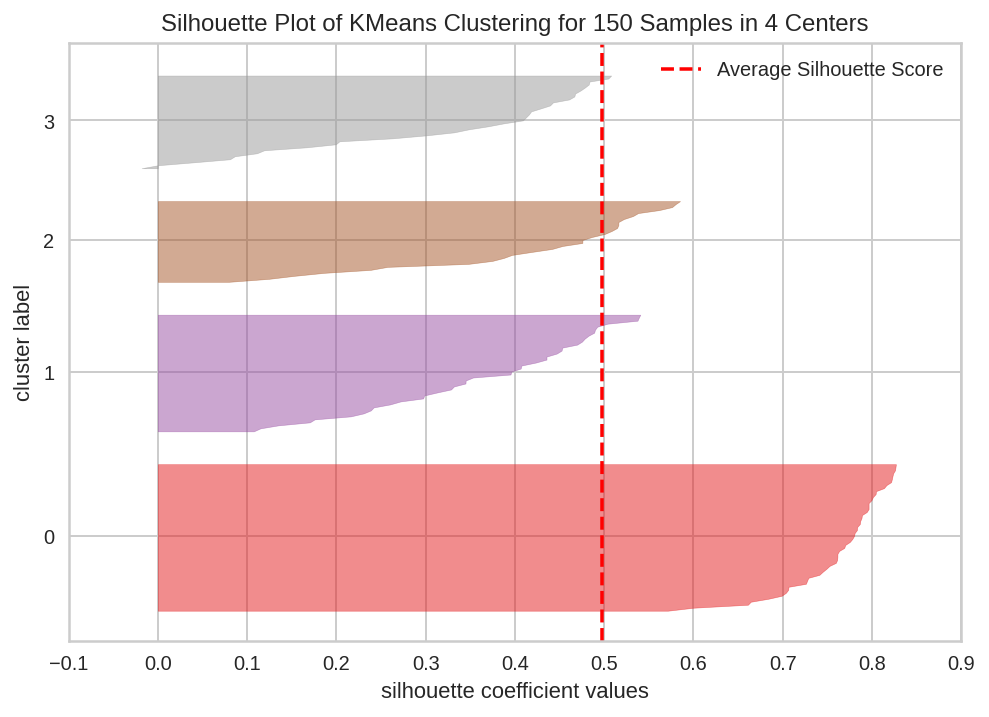

In [13]:
silhouette_plot(X, 2, 4)

#14 ກຳນົດ Clusters ເປັນ 3

In [14]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [15]:
model.fit(X)

KMeans(n_clusters=3)

# 15 ໄລຍະຫ່າງລະຫວ່າງແຕ່ລະຈຸດໃນ Centroid

In [16]:
model.transform(X)

array([[5.0595416 , 0.14694217, 3.41925061],
       [5.11494335, 0.43816892, 3.39857426],
       [5.27935534, 0.41230086, 3.56935666],
       [5.15358977, 0.51883716, 3.42240962],
       [5.10433388, 0.19796969, 3.46726403],
       [4.68148797, 0.68380699, 3.14673162],
       [5.21147652, 0.41520116, 3.51650264],
       [5.00252706, 0.0599333 , 3.33654987],
       [5.32798107, 0.80099438, 3.57233779],
       [5.06790865, 0.36659514, 3.3583767 ],
       [4.89806763, 0.48784424, 3.32449131],
       [4.9966845 , 0.25138019, 3.31126872],
       [5.19103612, 0.49192682, 3.46661272],
       [5.65173594, 0.90906105, 3.90578362],
       [5.10804455, 1.02019214, 3.646649  ],
       [4.88564095, 1.21309192, 3.49427881],
       [5.03090587, 0.66241377, 3.495248  ],
       [5.02342022, 0.1509702 , 3.38444981],
       [4.61792995, 0.82848778, 3.11245944],
       [4.97213426, 0.39898872, 3.37738931],
       [4.6955761 , 0.46172719, 3.07471224],
       [4.9236821 , 0.33762701, 3.31506588],
       [5.

#16. ສະແດງການຈັດກຸ່ມໃນຮູບແບບ 0,1,2 (ຕາມລຳຂອງອາເລ)

In [17]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#17 ສະແດງການຈັດກຸ່ມເປັນ Species

In [18]:
df['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

#18 ສະແດງ dataframe

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#19

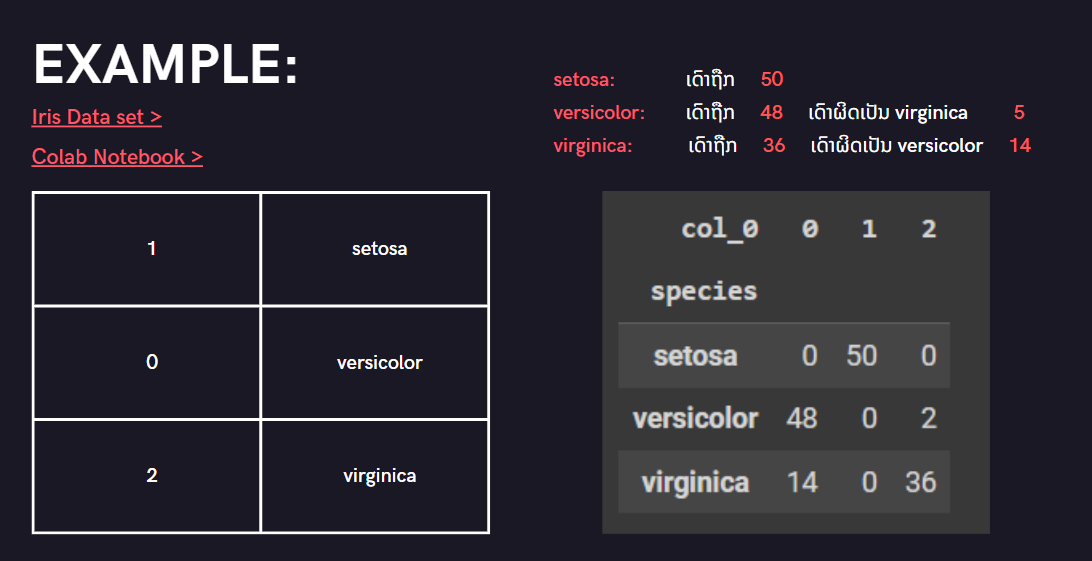

In [20]:
pd.crosstab(df['species'], model.labels_)

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


#20 ປ້ອນຂໍ້ມູນທີ່ໃກ້ຄຽງເຂົ້າໄປໃຫ້ ລະບົບກວດເບິ່ງ

In [21]:
model.predict([
    [6, 2, 4.3, 1.7],
    [7, 3.2, 6, 2],
    [5, 3, 1, .25]
              ])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2, 0, 1], dtype=int32)

#21 ການເຮັດ Elbow method


*   ຄຳນວນຄ່າ inertia




In [22]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 152.36870647733906],
 [3, 78.940841426146],
 [4, 57.344923809523806],
 [5, 46.53558205128205],
 [6, 38.930963049671746],
 [7, 34.299985543844244],
 [8, 29.90685675596546],
 [9, 27.966023596286757]]

In [23]:
xy=np.array(ssd)
print(xy)

[[  2.         152.36870648]
 [  3.          78.94084143]
 [  4.          57.34492381]
 [  5.          46.53558205]
 [  6.          38.93096305]
 [  7.          34.29998554]
 [  8.          29.90685676]
 [  9.          27.9660236 ]]


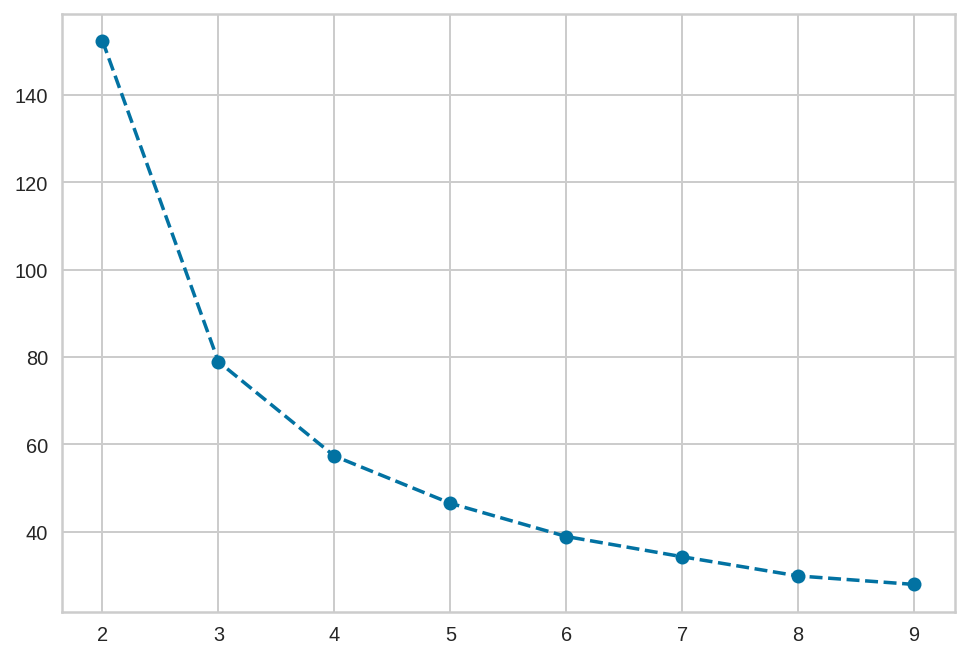

In [24]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')

In [25]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,152.368706
1,3,78.940841
2,4,57.344924
3,5,46.535582
4,6,38.930963
5,7,34.299986
6,8,29.906857
7,9,27.966024


In [26]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,152.368706,NaN
1,3,78.940841,-48.190909
2,4,57.344924,-27.357091
3,5,46.535582,-18.849692
4,6,38.930963,-16.341515
5,7,34.299986,-11.895358
6,8,29.906857,-12.807961
7,9,27.966024,-6.489593


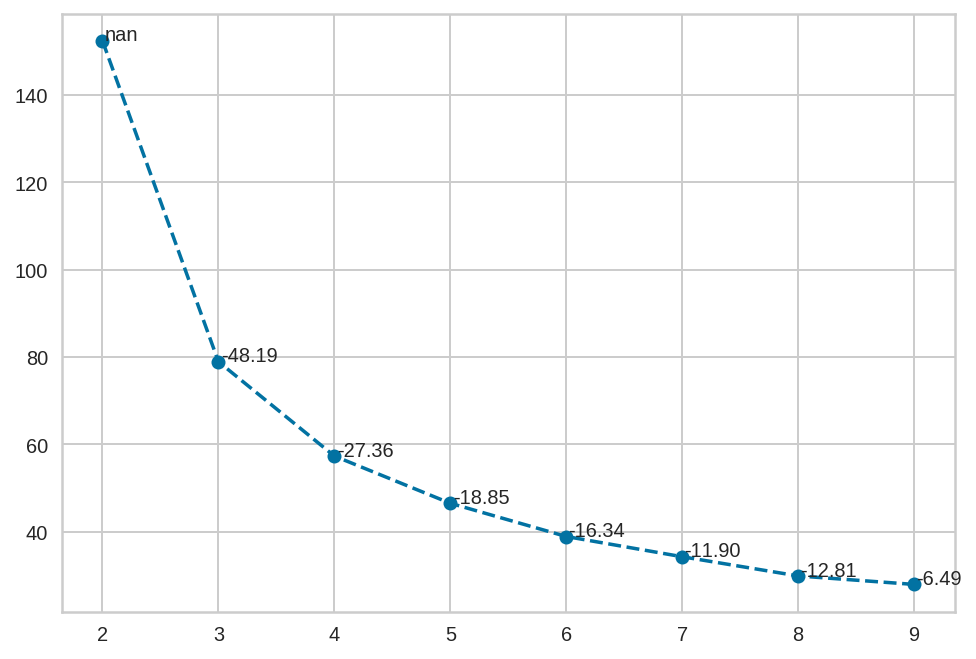

In [27]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

In [28]:
df['cluster']=model.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


# 22 ການເຮັດ groupby ເພື່ອຈັດການກຸ່ມຂໍ້ມູນໃນ Pandas



*   ເພື່ອໃຫ້ງ່າຍຕໍ່ການປະມວນຜົນ ຕາມຈຸດປະສົ່ງຂອງເຮົາ




In [29]:
df.groupby('cluster').describe().T

cluster                     0          1          2
sepal_length count  38.000000  50.000000  62.000000
             mean    6.850000   5.006000   5.901613
             std     0.494155   0.352490   0.466410
             min     6.100000   4.300000   4.900000
             25%     6.425000   4.800000   5.600000
             50%     6.700000   5.000000   5.900000
             75%     7.200000   5.200000   6.200000
             max     7.900000   5.800000   7.000000
sepal_width  count  38.000000  50.000000  62.000000
             mean    3.073684   3.418000   2.748387
             std     0.290092   0.381024   0.296284
             min     2.500000   2.300000   2.000000
             25%     2.925000   3.125000   2.500000
             50%     3.000000   3.400000   2.800000
             75%     3.200000   3.675000   3.000000
             max     3.800000   4.400000   3.400000
petal_length count  38.000000  50.000000  62.000000
             mean    5.742105   1.464000   4.393548
             std     0.488590   0.173511   0.508895
             min     4.900000   1.000000   3.000000
             25%     5.425000   1.400000   4.025000
             50%     5.650000   1.500000   4.500000
             75%     6.000000   1.575000   4.800000
             max     6.900000   1.900000   5.100000
petal_width  count  38.000000  50.000000  62.000000
             mean    2.071053   0.244000   1.433871
             std     0.279872   0.107210   0.297500
             min     1.400000   0.100000   1.000000
             25%     1.825000   0.200000   1.300000
             50%     2.100000   0.200000   1.400000
             75%     2.300000   0.300000   1.575000
             max     2.500000   0.600000   2.400000

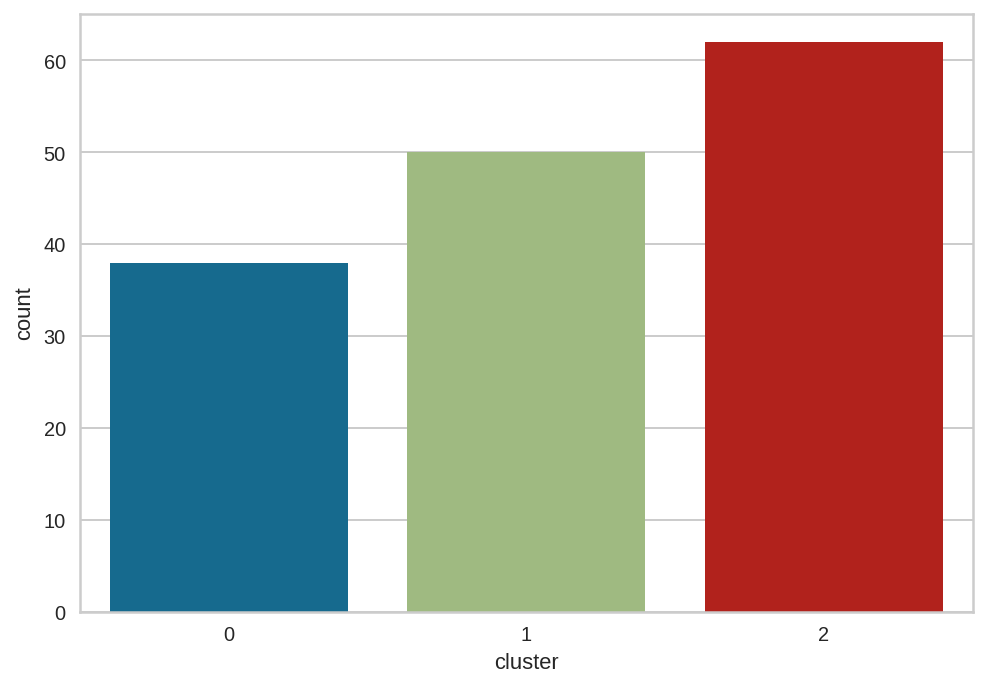

In [30]:
sns.countplot(x='cluster', data=df)

# Groupby head(3)





In [31]:
df.groupby('cluster').head(3).sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
52,6.9,3.1,4.9,1.5,versicolor,0
77,6.7,3.0,5.0,1.7,versicolor,0
100,6.3,3.3,6.0,2.5,virginica,0
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
53,5.5,2.3,4.0,1.3,versicolor,2


# 23 Subplots

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.7,3.0,5.65,2.1
1,5.0,3.4,1.50,0.2
2,5.9,2.8,4.50,1.4


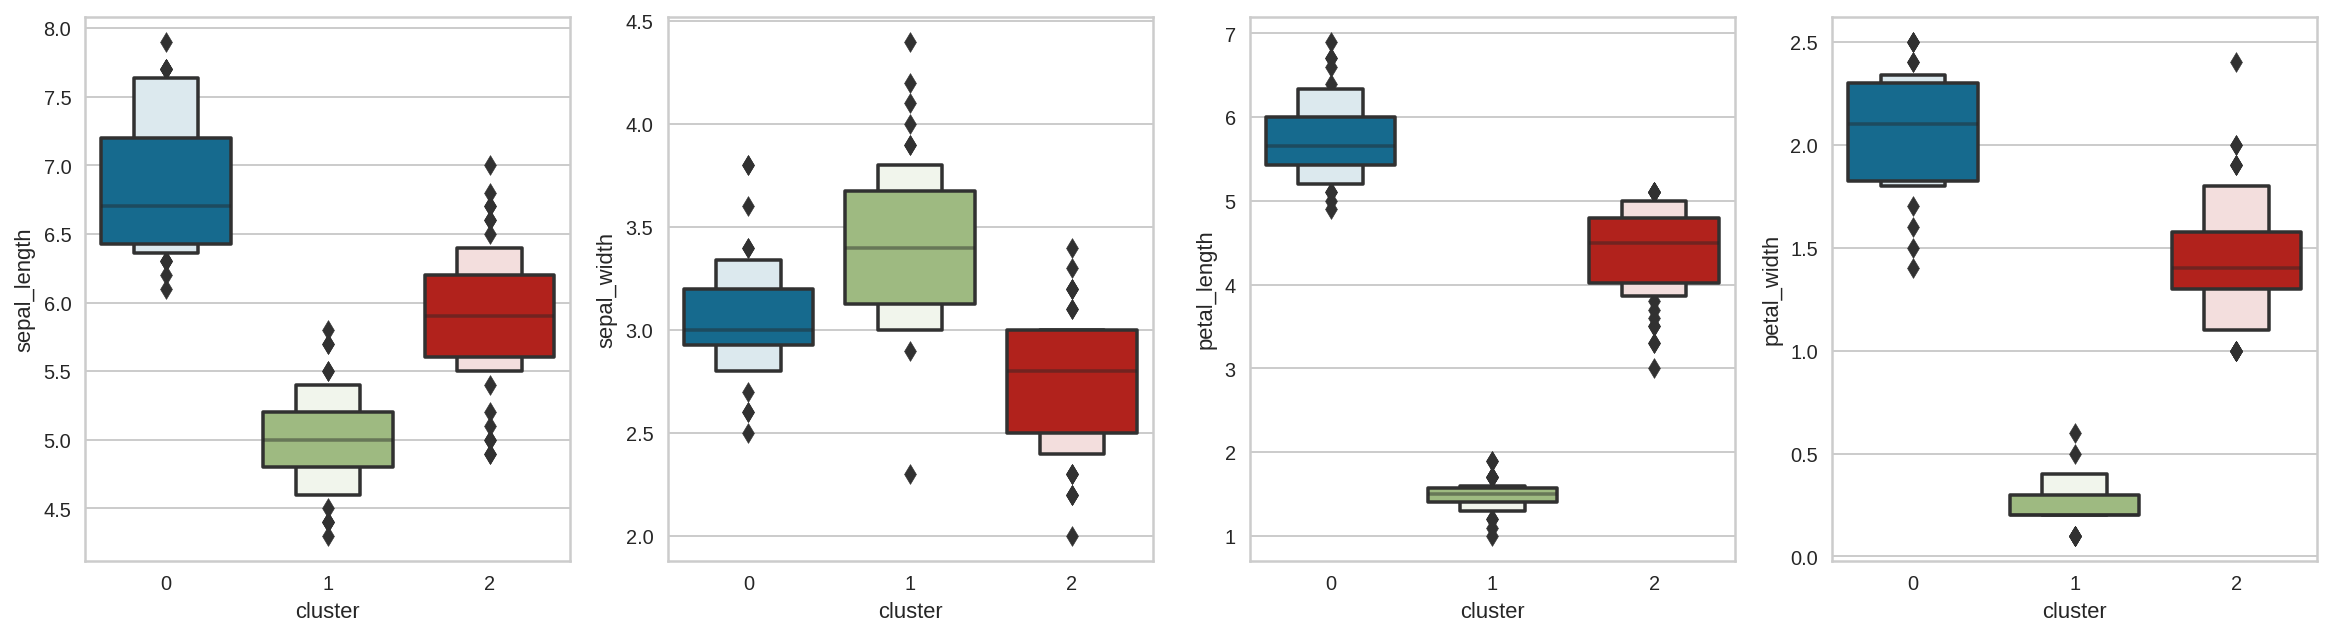

In [32]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(ncols=len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])
df.groupby('cluster').median()

# 24 heatmap ຄວາມສຳພັນຂອງຂໍ້ມູນ

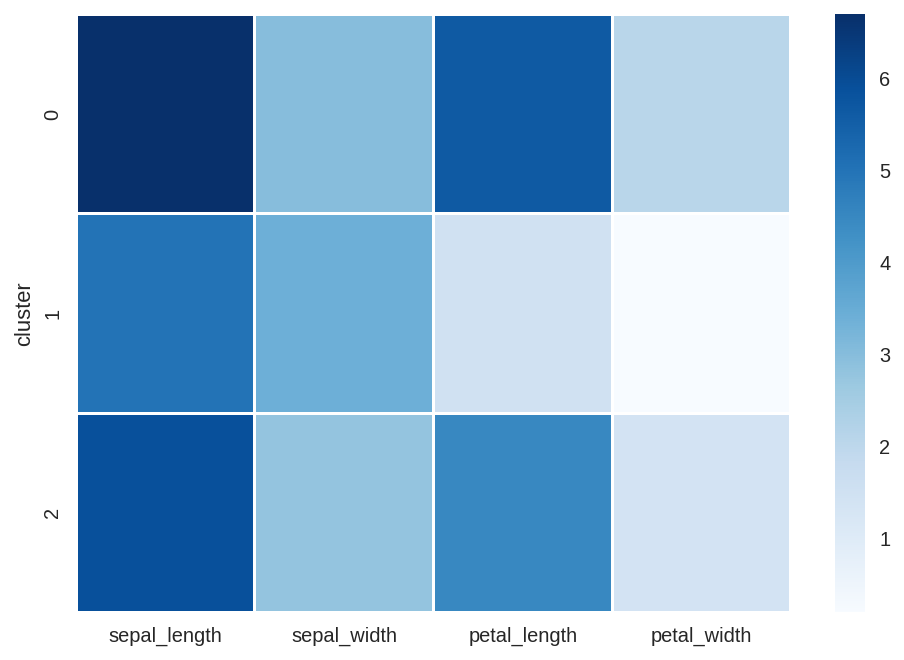

In [33]:
sns.heatmap(df.groupby('cluster').median(), cmap="Blues", linewidths=1)

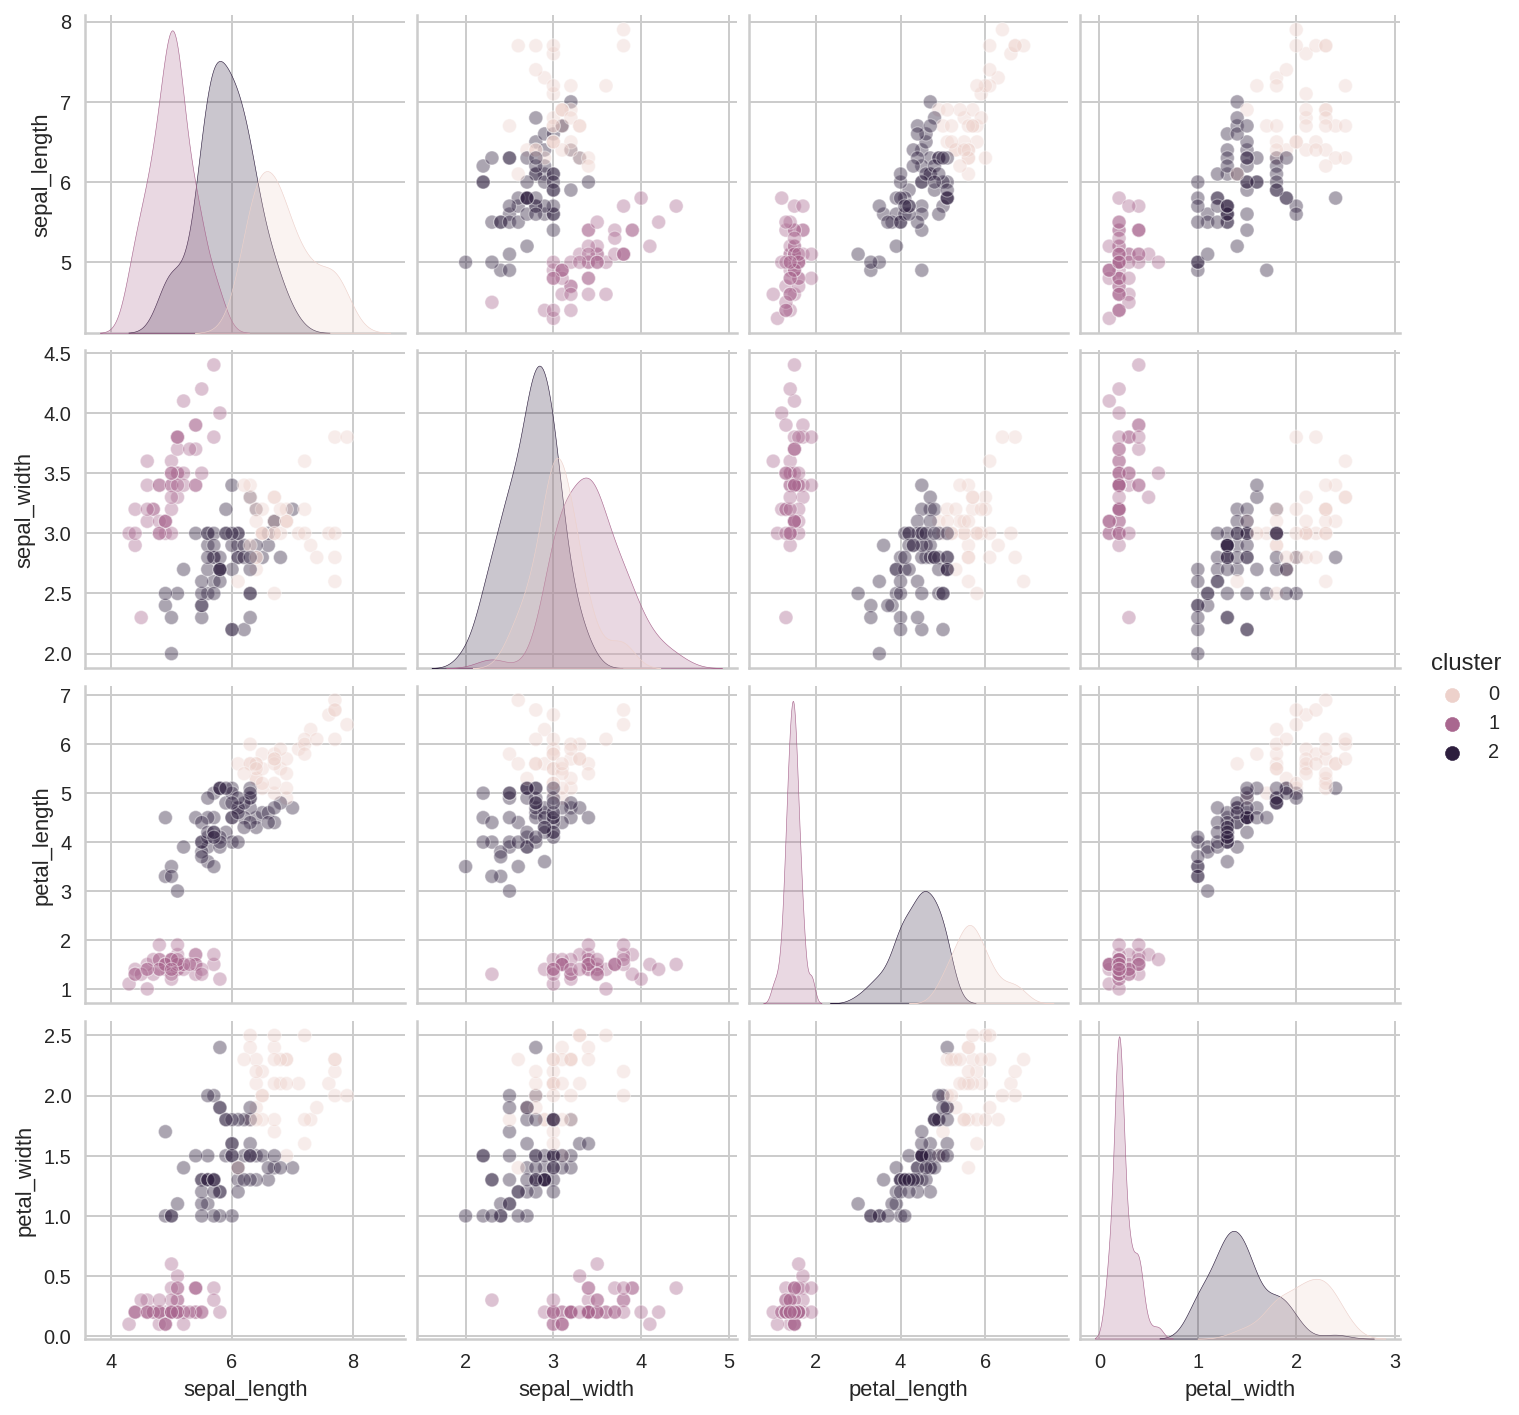

In [34]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='cluster',
             plot_kws={'alpha': .4});

ສະຫຼຸບ:



*   ການຈັດກຸ່ມ ຫຼື Clustering ໂດຍໃສ່ K-mean ແລ້ວກໍມີການສະແດງອອກມາໃນຮູບແບບດັ່ງນີ້:


1.   pairplot
2.   silhouette_plot ຕົວຢ່າງຂໍ້ມູນ ແລະ visualizer
3.   Elbow method
4.   groupby ຈັດການກຸ່ມຂໍ້ມູນໃນ Pandas
5.   Subplots ຮູບແບບທຽນໄຂ
6.   heatmap ຄວາມສຳພັນຂອງຂໍ້ມູນ



